# **Connecte to google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Package**

In [19]:
from numpy import vstack, sqrt
from pandas import read_csv, DataFrame
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader, random_split
from torch import Tensor
from torch.nn import Linear, Sigmoid, Module, MSELoss
from torch.optim import SGD
from torch.nn.init import xavier_uniform_
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from torch.utils.data import Dataset, random_split
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as func
from torch.utils.data import DataLoader
from torch.optim import SGD
from torch.nn import MSELoss
from tqdm import tqdm



# **Data loading**

In [18]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/prices.csv")
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# **Data visualization**

**Data Types**

In [ ]:
df.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [ ]:
df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

**Missing Values**

In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

**Basic Statistics description**

In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


**Time-Series Visualization**

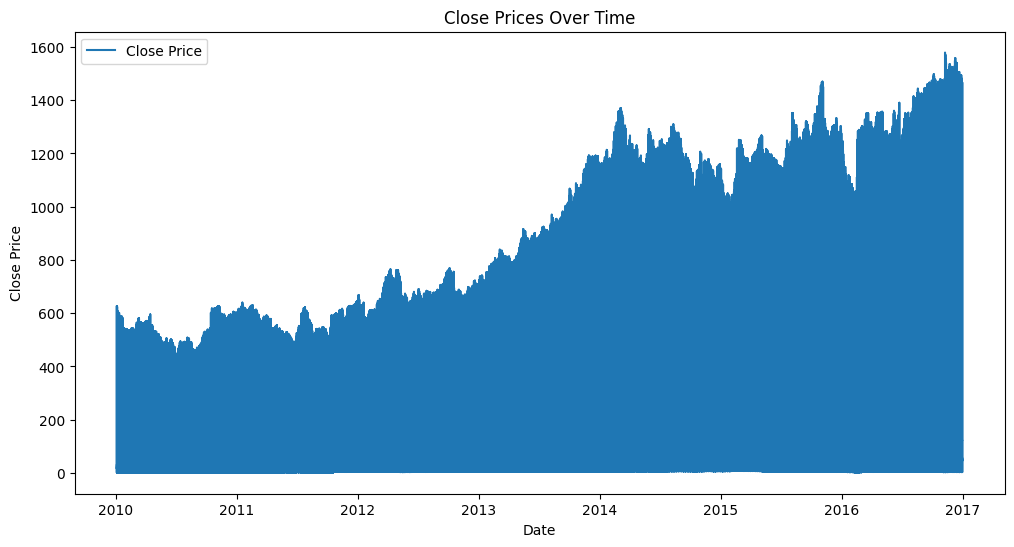

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Symbol Distribution**

In [ ]:
symbol_counts = df['symbol'].value_counts()
print(symbol_counts)

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64


**Volume Analysis**

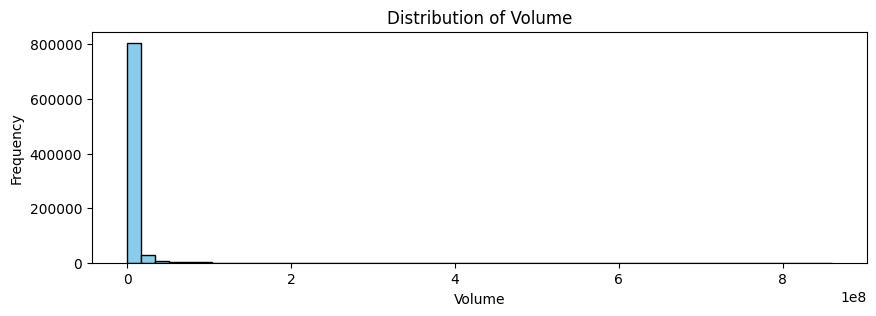

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(df['volume'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

**Correlation Analysis**

<ipython-input-54-df4d5b6d505d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


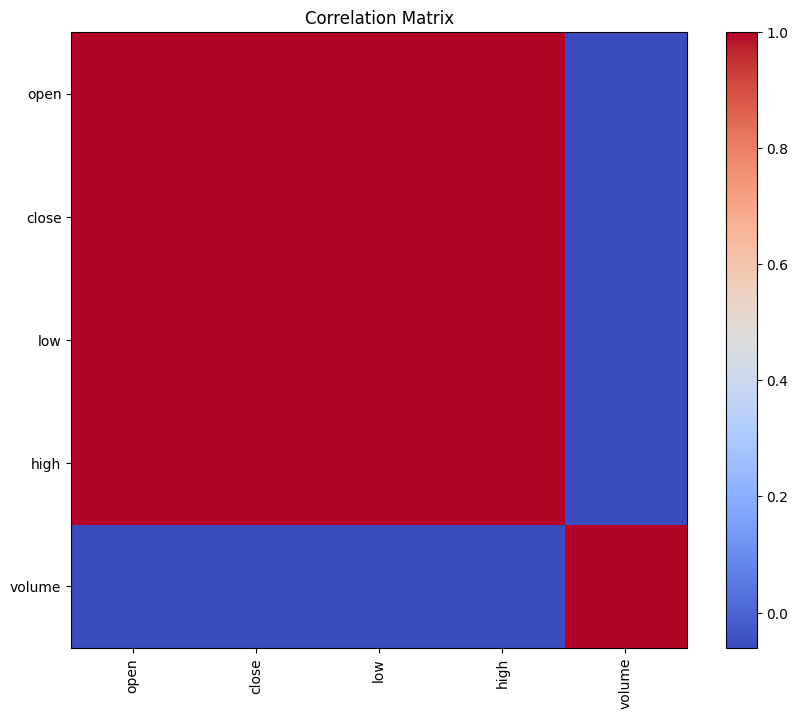

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,open,close,low,high,volume
open,1.000000,0.999849,0.999916,0.999930,-0.059950
close,0.999849,1.000000,0.999928,0.999927,-0.060154
low,0.999916,0.999928,1.000000,0.999892,-0.060760
high,0.999930,0.999927,0.999892,1.000000,-0.059452
volume,-0.059950,-0.060154,-0.060760,-0.059452,1.000000


**Scatter matrix**

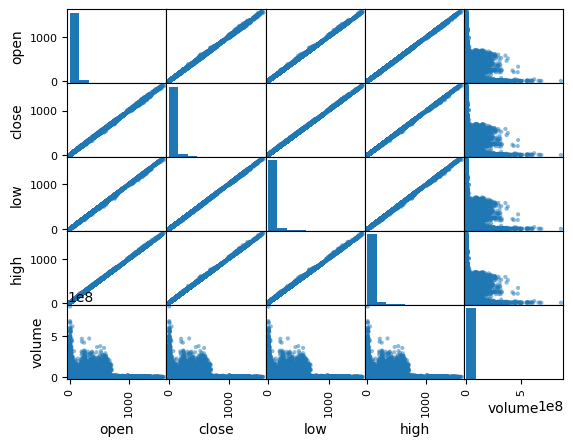

In [ ]:
scatter_matrix(df)
plt.show()

**Histogram bar**

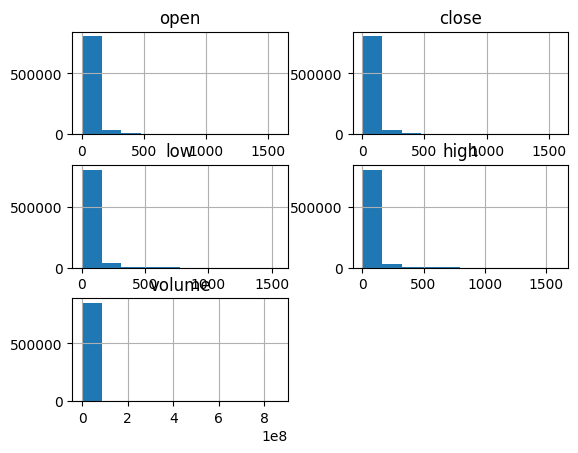

In [ ]:
df.hist()
plt.show()

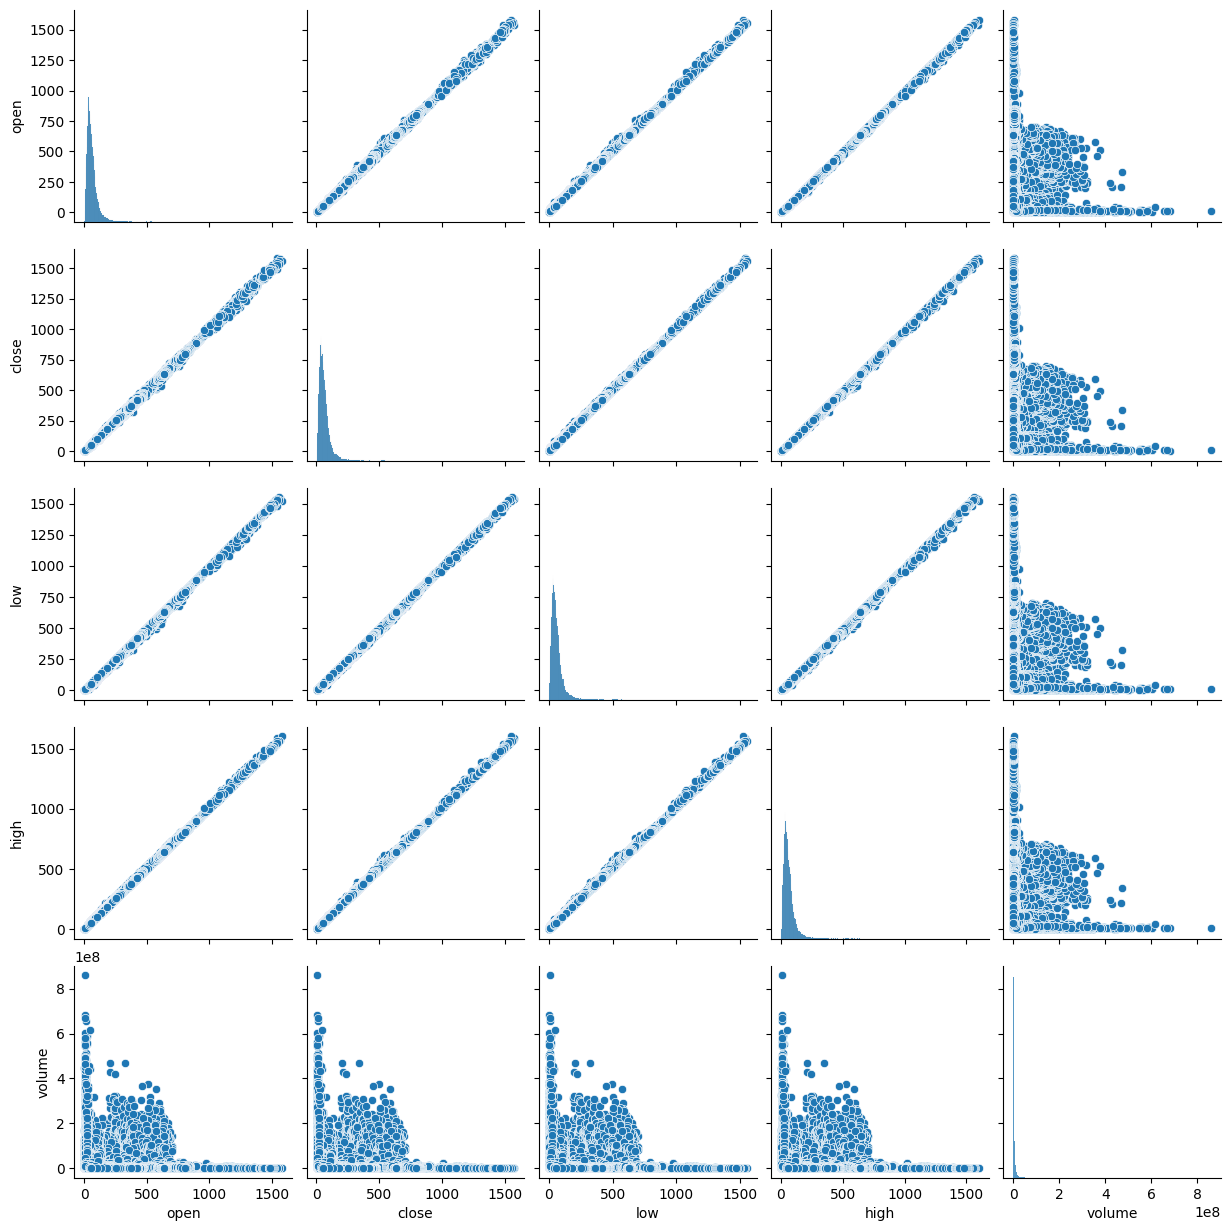

In [ ]:
sns.pairplot(df[['open', 'close', 'low', 'high', 'volume']])
plt.show()

#**Deep Neural Network Architecture**

**Features extraction**

In [3]:
import torch
features = df[['open', 'low', 'high', 'volume']]
target = df['close']

**Standardize the features**

In [4]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

Split the data into training and testing sets**


In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**Convert the data to PyTorch tensors**


In [6]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

**Define the Deep Neural Network (DNN) architecture**

In [7]:
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

**Instantiate the model**


In [8]:
input_size = X_train.shape[1]
model = RegressionModel(input_size)

# **Dataset definition preparation**

In [16]:
from torch.utils.data import Dataset, random_split
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt


# dataset definition preparation
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        self.df = read_csv(path)

        self.df.head()
        # Drop the date column
        self.df = self.df.drop('date', axis=1)
        # Drop the symbol column
        self.df = self.df.drop('symbol', axis=1)
        # store the inputs and outputs
        self.X = self.df.values[:, :-1]
        self.y = self.df.values[:, -1]
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

    def print_info(self):
        print(self.df.info())
        print(self.df.describe())
        print(self.df.head())
        print(self.df.isnull().sum())

    def visualize(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(y='open', data=self.df)
        plt.title('Spans from 2010 to the end 2016')
        plt.show()

    def check(self):
        # Step 3: Check for missing values
        print(self.df.isnull().sum())

**DNN architecture**

In [11]:
class Net(nn.Module):
    def __init__(self, n_neurons=10):
        super(Net, self).__init__()
        # Define the layers of the network here
        self.fc1 = nn.Linear(5, n_neurons)
        self.fc2 = nn.Linear(n_neurons, n_neurons)
        self.fc3 = nn.Linear(n_neurons, 1)

    def forward(self, x):
        # Define the forward pass
        x = func.relu(self.fc1(x))
        x = func.relu(self.fc2(x))
        # no activation function for the la
        x = self.fc3(x)
        return x

model = Net()


# **Model training**

In [12]:


# Step 7:
def train_model(train_data, training_model):
    size = len(train_data.dataset)
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    # enumerate epochs
    for epoch in tqdm(range(100), desc='Training Epochs'):
        print(f"Epoch {epoch + 1}\n-------------------------------")
        # enumerate mini batches
        for batch, (inputs, targets) in enumerate(train_data):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = training_model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

            #if batch % 100 == 0:
            loss, current = loss.item(), batch * len(inputs)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# **Prepare the data**

In [13]:
def prepare_data(dataset):
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    return DataLoader(train, batch_size=1024, shuffle=True), DataLoader(test, batch_size=1024, shuffle=False)

# **Train the model**

In [19]:
train_dl, test_dl = prepare_data(df)
print(len(train_dl.dataset), len(test_dl.dataset))

train_model(train_dl, model)

# **PyTorch model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetRegressor
import torch.optim as optim


def create_model(n_neurons=10):
    return Net(n_neurons=n_neurons)



# **grid search**

In [ ]:

def perform_grid_search(X, y):
    # Define the hyperparameters
    hyperparameters = {
        'module__n_neurons': [10, 20, 30],
        'lr': [0.01, 0.001, 0.0001],
        'max_epochs': [10, 50, 100],
        'optimizer': [optim.SGD, optim.Adam],
    }

    # Create a Skorch neural network object
    net = NeuralNetRegressor(module=create_model, criterion=nn.MSELoss, iterator_train__shuffle=True)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(net, hyperparameters, cv=3, scoring='neg_mean_squared_error')

    # Fit the GridSearchCV object
    grid_search.fit(X, y)

    # Print the best parameters
    print("Best parameters found: ", grid_search.best_params_)

    return grid_search.best_estimator_


best_model = perform_grid_search(data_set.X, data_set.y)

# **Initialize lists to store loss and accuracy values**

In [ ]:
import torch

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []


# Step 14: Train the model
def test_model(test_data, testing_model):
    size = len(test_data.dataset)
    # define the optimization
    criterion = MSELoss()
    current_test_loss = 0
    correct = 0

    with torch.no_grad():
        for inputs, targets in test_data:
            # compute the model output
            outputs = testing_model(inputs)
            # calculate loss
            current_test_loss += criterion(outputs, targets).item()
            # calculate accuracy
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(targets.view_as(pred)).sum().item()

    current_test_loss /= size
    current_test_accuracy = correct / size
    print(f"Test Error: \n Accuracy: {(100 * current_test_accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, test_accuracy


for epoch in range(100):
    # Train the model
    train_loss, train_accuracy = train_model(train_dl, model)
    # Test the model
    test_loss, test_accuracy = test_model(test_dl, model)
    # Store the loss and accuracy values
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


# **loss and accuracy values**

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.title('Loss / Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy / Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# **Net With Regularization**

In [ ]:
class NetWithRegularization(nn.Module):
    def __init__(self, n_neurons=10, dropout_rate=0.5, *args, **kwargs):
        super(NetWithRegularization, self).__init__()
        self.fc1 = nn.Linear(5, n_neurons)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(n_neurons, n_neurons)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(n_neurons, 1)

    def forward(self, x):
        x = func.relu(self.fc1(x))
        x = self.dropout1(x)
        x = func.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


def train_model(train_data, validation_data, training_model, l1_lambda=0.005):
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)  # L2 regularization
    best_val_loss = float('inf')
    for epoch in tqdm(range(100), desc='Training Epochs'):
        # Training Phase
        training_model.train()
        for inputs, targets in train_data:
            optimizer.zero_grad()
            outputs = training_model(inputs)
            loss = criterion(outputs, targets)
            l1_norm = sum(p.abs().sum() for p in model.parameters())  # L1 regularization
            loss = loss + l1_lambda * l1_norm
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in validation_data:
                outputs = training_model(inputs)
                val_loss += criterion(outputs, targets).item()

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
        else:
            print("Early stopping")
            break

# **Test**

In [ ]:
# Test the original model
test_loss_original, test_accuracy_original = test_model(test_dl, model)
print(f"Original Model - Test Loss: {test_loss_original}, Test Accuracy: {test_accuracy_original}")

# Create an instance of the network with regularization
model_with_regularization = NetWithRegularization()

# Train the model with regularization
train_model(train_dl, test_dl, model_with_regularization)

# Test the model with regularization
test_loss_regularized, test_accuracy_regularized = test_model(test_dl, model_with_regularization)
print(f"Model with Regularization - Test Loss: {test_loss_regularized}, Test Accuracy: {test_accuracy_regularized}")